In [1]:
from peak_warming_calculator import peak_warming_calculator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

In [3]:
import time

In [4]:
import pandas as pd

# Sensitivity Analysis

In [5]:
r_minus_g = 0.015
consumption_growth = 0.02
consumption_discount = consumption_growth + r_minus_g

In [6]:
num_of_sample = 8
gamma_sample = np.linspace(2, 2*2, num_of_sample)
D0_sample = np.linspace(0.00236, 0.00236*2, num_of_sample)
# D2_sample = np.linspace(0.01, 0.01*2, num_of_sample)

In [7]:
# T = 2
# gamma_sample = (1/np.log(2))*np.log(D2_sample/D0_sample)

In [8]:
# D2_sample

In [9]:
# gamma_sample

In [10]:
P_100 = 300
P_50 = 0.4 * P_100
r = consumption_discount
s = 3 * r
T_TCRE_1 = 0.00045

In [11]:
peak_T_list = []
output_data_list = []

for i in range(num_of_sample):
    gamma = gamma_sample[i]
#     D2 = D2_sample[i]
    print(i)
    
    peak_T_const_gamma = []
    output_data_const_gamma = []
    for j in range(num_of_sample):
        D0 = D0_sample[j]
#         gamma = (1/np.log(2))*np.log(D2/D0)
        peak_T, output_data = peak_warming_calculator(P_50=P_50, P_100=P_100, gamma=gamma, D0=D0, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, T_TCRE_1=T_TCRE_1, delta_T=1.5, return_all_output=True)
#         print(D0, gamma, peak_T)
#         print(peak_T)
        peak_T_const_gamma.append(peak_T)
        output_data_const_gamma.append(output_data)
#         peak_T_list.append(peak_T)
    
    peak_T_list.append(peak_T_const_gamma)
    output_data_list.append(output_data_const_gamma)



0


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calc/MAC_functions.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


1
2
3
4
5
6
7


In [12]:
peak_T_array = np.asarray(peak_T_list)

In [13]:
# D0_sample_i, D2_sample_i = np.meshgrid(D0_sample, D2_sample)
D0_sample_i, gamma_sample_i = np.meshgrid(D0_sample, gamma_sample)

In [14]:
# D2_sample_i

In [15]:
D0_sample_i

array([[0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ],
       [0.00236   , 0.00269714, 0.00303429, 0.00337143, 0.00370857,
        0.00404571, 0.00438286, 0.00472   ]])

In [16]:
peak_T_array

array([[2.41328344, 2.34550204, 2.28745155, 2.23692908, 2.1923919 ,
        2.15270851, 2.11703427, 2.0847223 ],
       [2.2293198 , 2.17080182, 2.12045689, 2.07707937, 2.03891888,
        2.00497842, 1.97451714, 1.94696153],
       [2.08491946, 2.03412586, 1.99082123, 1.95327702, 1.92028765,
        1.89097415, 1.86508315, 1.84127461],
       [1.97028012, 1.92584781, 1.88800969, 1.85567912, 1.82682236,
        1.80119198, 1.77822307, 1.7570256 ],
       [1.87756678, 1.83840677, 1.80559974, 1.7766104 , 1.75059948,
        1.72813599, 1.70799834, 1.69031995],
       [1.80217561, 1.76668003, 1.73766185, 1.71186081, 1.68874914,
        1.66938271, 1.65134764, 1.63452087],
       [1.73835363, 1.70700953, 1.68119991, 1.65742071, 1.63797022,
        1.61991414, 1.60328984, 1.5893763 ],
       [1.68585135, 1.65763851, 1.63367172, 1.6121348 , 1.59455192,
        1.57778471, 1.56316876, 1.55019668]])

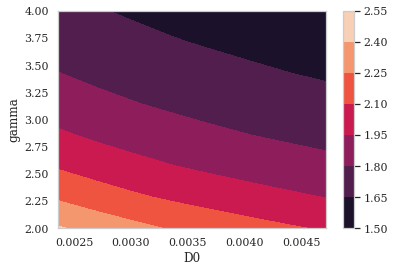

In [22]:
fig, axs = plt.subplots(1,1)

cs = axs.contourf(D0_sample_i, gamma_sample_i, peak_T_array)
plt.xlabel("D0")
plt.ylabel("gamma")
# plt.ylim(2, 3.25)
fig.colorbar(cs, ax=axs)
fig.savefig('paper_figures/Nordhaus_peak_T_sensitivity.png', bbox_inches='tight', dpi = 300)

In [18]:
SCC_list = []

for j in range(len(output_data_list)):
    SCC_const_gamma = []
    for i in range(len(output_data_list[j])):
        if type(output_data_list[j][i]) is pd.DataFrame:
            SCC = output_data_list[j][i]['SCC actual'].loc[2020]
        else:
            SCC = None
        SCC_const_gamma.append(SCC)
    SCC_list.append(SCC_const_gamma)

In [19]:
SCC_array = np.asarray(SCC_list)

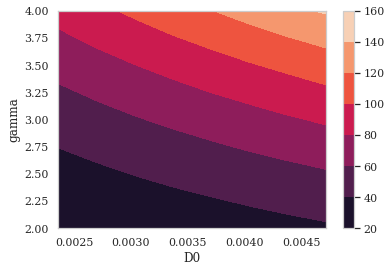

In [21]:
fig, axs = plt.subplots(1,1)

cs = axs.contourf(D0_sample_i, gamma_sample_i, SCC_array)
plt.xlabel("D0")
plt.ylabel("gamma")
# plt.ylim(2, 3.25)
fig.colorbar(cs, ax=axs)

fig.savefig('paper_figures/Nordhaus_SCC_sensitivity.png', bbox_inches='tight', dpi = 300)